In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt

In [2]:
df=web.DataReader('DMART.NS',data_source='yahoo',start='2018-04-01',end='2021-01-13')

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-04-02,1393.000000,1326.349976,1328.800049,1357.300049,1129225.0,1357.300049
2018-04-03,1371.400024,1332.650024,1336.699951,1364.300049,543718.0,1364.300049
2018-04-04,1385.199951,1350.000000,1369.300049,1359.150024,682255.0,1359.150024
2018-04-05,1410.000000,1371.300049,1377.800049,1401.300049,1261502.0,1401.300049
2018-04-06,1424.000000,1385.000000,1400.000000,1419.849976,966666.0,1419.849976
...,...,...,...,...,...,...
2021-01-08,2999.000000,2932.250000,2949.899902,2967.500000,742344.0,2967.500000
2021-01-11,3137.000000,2940.000000,3137.000000,2984.850098,1845898.0,2984.850098
2021-01-12,3009.500000,2939.449951,2959.000000,2998.199951,1081702.0,2998.199951


In [4]:
df.shape

(688, 6)

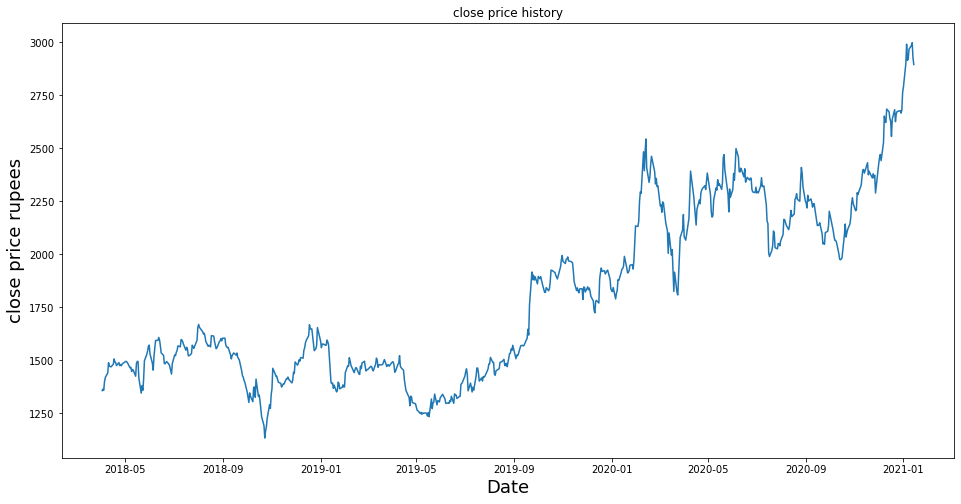

In [5]:
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price rupees',fontsize=18)
plt.show()

In [6]:
data=df.filter(["Close"])

In [7]:
data

,Close
Date,
2018-04-02,1357.300049
2018-04-03,1364.300049
2018-04-04,1359.150024
2018-04-05,1401.300049
2018-04-06,1419.849976
...,...
2021-01-08,2967.500000
2021-01-11,2984.850098
2021-01-12,2998.199951


In [8]:
dataset=data.values

In [9]:
dataset

array([[1357.30004883],
       [1364.30004883],
       [1359.15002441],
       [1401.30004883],
       [1419.84997559],
       [1440.5       ],
       [1488.84997559],
       [1473.        ],
       [1471.25      ],
       [1469.09997559],
       [1481.40002441],
       [1506.80004883],
       [1492.65002441],
       [1488.65002441],
       [1475.40002441],
       [1489.5       ],
       [1475.75      ],
       [1480.25      ],
       [1474.34997559],
       [1483.        ],
       [1490.65002441],
       [1495.84997559],
       [1492.30004883],
       [1486.80004883],
       [1465.        ],
       [1467.15002441],
       [1447.75      ],
       [1456.44995117],
       [1453.90002441],
       [1425.19995117],
       [1485.44995117],
       [1494.94995117],
       [1495.        ],
       [1417.19995117],
       [1345.44995117],
       [1380.55004883],
       [1358.75      ],
       [1409.90002441],
       [1497.55004883],
       [1528.90002441],
       [1544.05004883],
       [1565.949

In [10]:
training_data_len=math.ceil(len(dataset)*.80)


In [11]:
training_data_len

551

In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [13]:
scaled_data

array([[0.11992497],
       [0.12367932],
       [0.12091718],
       [0.14352379],
       [0.15347279],
       [0.16454816],
       [0.19048003],
       [0.18197911],
       [0.18104052],
       [0.17988738],
       [0.18648435],
       [0.20010732],
       [0.19251814],
       [0.19037279],
       [0.18326633],
       [0.19082867],
       [0.18345404],
       [0.18586755],
       [0.18270315],
       [0.18734248],
       [0.19144547],
       [0.19423439],
       [0.19233044],
       [0.18938058],
       [0.17768841],
       [0.17884155],
       [0.1684366 ],
       [0.17310271],
       [0.17173509],
       [0.15634218],
       [0.18865648],
       [0.19375168],
       [0.19377852],
       [0.15205149],
       [0.11356932],
       [0.1323948 ],
       [0.12070263],
       [0.14813627],
       [0.1951462 ],
       [0.21196035],
       [0.22008587],
       [0.23183159],
       [0.23515692],
       [0.21314027],
       [0.18916604],
       [0.17165463],
       [0.20694561],
       [0.226

In [14]:
train_data=scaled_data[0:training_data_len,:]
test_data=scaled_data[training_data_len-60:,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.11992497, 0.12367932, 0.12091718, 0.14352379, 0.15347279,
       0.16454816, 0.19048003, 0.18197911, 0.18104052, 0.17988738,
       0.18648435, 0.20010732, 0.19251814, 0.19037279, 0.18326633,
       0.19082867, 0.18345404, 0.18586755, 0.18270315, 0.18734248,
       0.19144547, 0.19423439, 0.19233044, 0.18938058, 0.17768841,
       0.17884155, 0.1684366 , 0.17310271, 0.17173509, 0.15634218,
       0.18865648, 0.19375168, 0.19377852, 0.15205149, 0.11356932,
       0.1323948 , 0.12070263, 0.14813627, 0.1951462 , 0.21196035,
       0.22008587, 0.23183159, 0.23515692, 0.21314027, 0.18916604,
       0.17165463, 0.20694561, 0.22625374, 0.24663454, 0.24709041,
       0.25435774, 0.24786807, 0.23319928, 0.2154197 , 0.20914458,
       0.18844199, 0.18774473, 0.19128454, 0.19337627, 0.18600164])]
[0.17943150915962724]



In [15]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [16]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(491, 60, 1)

In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
491/491 [==============================] - 14s 23ms/step - loss: 0.0127
Epoch 2/10
491/491 [==============================] - 11s 23ms/step - loss: 0.0029
Epoch 3/10
491/491 [==============================] - 11s 23ms/step - loss: 0.0019
Epoch 4/10
491/491 [==============================] - 11s 23ms/step - loss: 0.0015
Epoch 5/10
491/491 [==============================] - 12s 24ms/step - loss: 0.0013
Epoch 6/10
491/491 [==============================] - 11s 23ms/step - loss: 0.0014
Epoch 7/10
491/491 [==============================] - 12s 23ms/step - loss: 0.0011
Epoch 8/10
491/491 [==============================] - 12s 24ms/step - loss: 9.6965e-04
Epoch 9/10
491/491 [==============================] - 12s 24ms/step - loss: 8.0090e-04
Epoch 10/10
491/491 [==============================] - 11s 23ms/step - loss: 9.9981e-04


In [20]:

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [21]:
x_test=np.array(x_test)

In [22]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [24]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

24.926213396726734

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


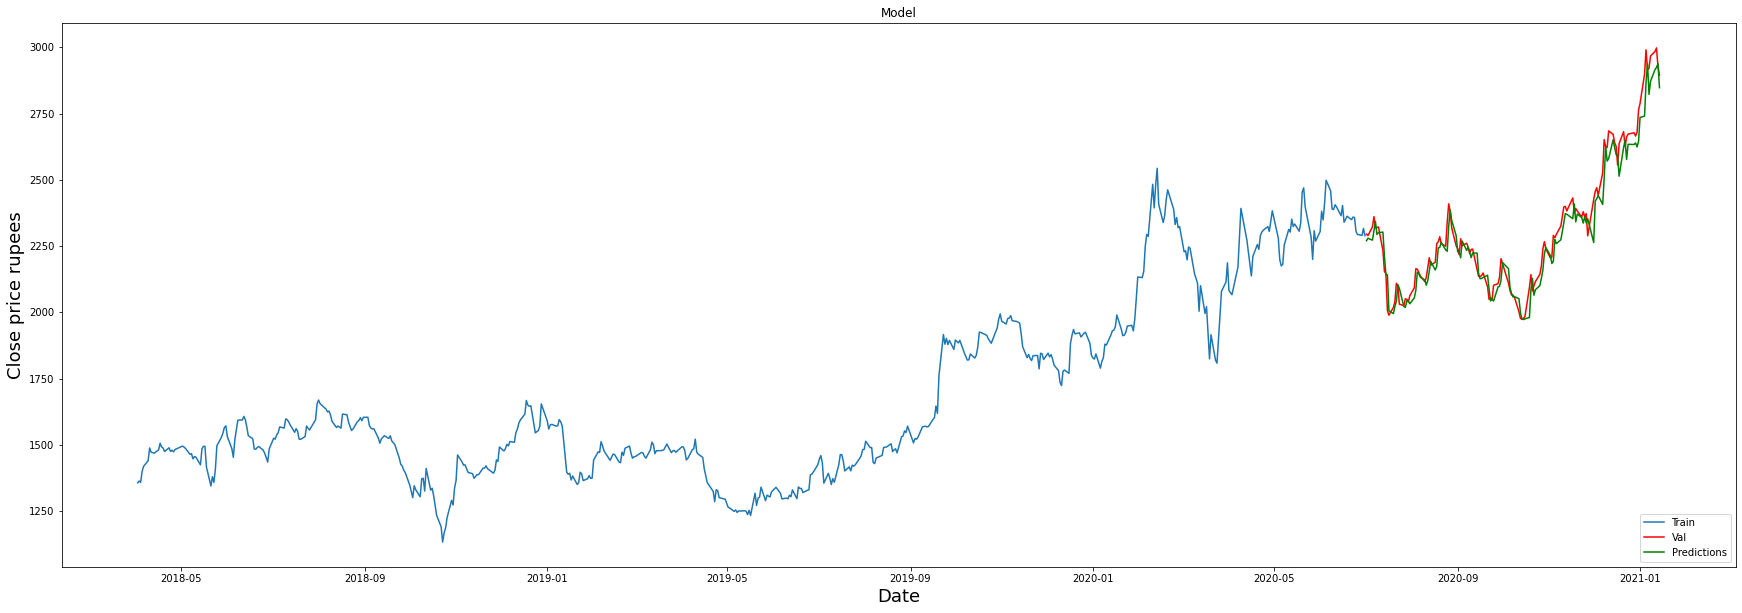

In [26]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
plt.figure(figsize=(30,10))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price rupees',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close'],color='red')
plt.plot(valid['predictions'],color='green')
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [27]:
valid

,Close,predictions
Date,,
2020-07-02,2295.500000,2270.510254
2020-07-03,2290.149902,2280.089844
2020-07-06,2323.000000,2272.964355
2020-07-07,2361.699951,2307.502441
2020-07-08,2319.550049,2343.127686
...,...,...
2021-01-08,2967.500000,2872.188721
2021-01-11,2984.850098,2916.566895
2021-01-12,2998.199951,2924.588135


In [30]:
dmart=web.DataReader('DMART.NS',data_source='yahoo',start='2018-01-01',end='2021-01-12')
new_df=dmart.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)


In [32]:
dmart

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,1193.250000,1166.000000,1188.300049,1170.500000,334392.0,1170.500000
2018-01-02,1178.199951,1155.599976,1173.699951,1160.000000,302709.0,1160.000000
2018-01-03,1204.400024,1160.000000,1162.699951,1184.550049,580610.0,1184.550049
2018-01-04,1215.000000,1186.000000,1187.849976,1203.099976,707905.0,1203.099976
2018-01-05,1268.000000,1208.550049,1210.099976,1243.400024,1244328.0,1243.400024
...,...,...,...,...,...,...
2021-01-07,3008.000000,2880.000000,2971.699951,2921.449951,872261.0,2921.449951
2021-01-08,2999.000000,2932.250000,2949.899902,2967.500000,742344.0,2967.500000
2021-01-11,3137.000000,2940.000000,3137.000000,2984.850098,1845898.0,2984.850098


In [33]:
pred_price=scaler.inverse_transform(pred_price)

In [34]:
pred_price

array([[2848.042]], dtype=float32)

In [42]:
dmart1=web.DataReader('DMART.NS',data_source='yahoo',start='2021-01-14',end='2021-01-14')

In [43]:
dmart2=dmart1['Close'].values

In [41]:
dmart1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-13,3008.649902,2878.50,3001,2926.100098,421057,2926.100098
2021-01-14,2940.000000,2875.25,2939,2895.550049,340922,2895.550049
